In [1]:
# 메모리에 있는 모든 변수를 지우고 새롭게 시작함
all = [var for var in globals() if var[0] != "_"]
for var in all:
    del globals()[var]

In [2]:
# 사용되는 패키지을 읽어들임
import numpy as np
import pandas as pd
import random
import calendar
import matplotlib.pyplot as plt
from scipy.stats import mstats, skew, kurtosis
import statsmodels.api as sm
import seaborn as sns
from statsmodels.graphics.gofplots import qqline
import math
import warnings
warnings.filterwarnings('ignore')

In [44]:
#colab 사용할 경우 구글드라이버 폴더에 접근하게 함
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


퀀트 데이터에서 2005년부터 2020년까지 이 전체 기간 동안 수익률이 있는 주식 10개를 임으로 고른 다음 다음에 답하시오.
기대수익률 (기대부)를 극대화할 경우 최적 포트폴리오는?

In [3]:
df = pd.read_excel("QuantDataR.xlsx", None, index_col=0 )
df_names = list(df.keys())

print("==========================================================================")
print("Spreadsheet 확인")
print(df_names)


Spreadsheet 확인
['D_Market', 'D_RI', 'D_TradingValue', 'D_P', 'M_Market', 'Beta', 'Volatility', 'DY', 'RI', 'TradingValue', 'Cash', 'AccReceivables', 'Inventory', 'CurrentAsset', 'R&D', 'Plants', 'Intangible', 'Total Asset', 'AccPayable', 'CurrentLiability', 'LongTermDebt', 'TotalLiability', 'CommonEquity', 'TotalShareEqu', 'Sales', 'CoGS', 'DepArm', 'OperatingIncome', 'EBIT', 'Interest', 'NetIncome', 'DividendPerShare', 'EPS', 'CommonShares', 'Investment', 'Employee', 'WorkingCap', 'MarketValue']


In [4]:
# 개별주식의 총수익률 (RI) 데이터 읽음
RID = df['RI']
RID = RID.iloc[0:168,:]
print("--------------------------------------------------------------------------")
print("데이터형식 확인")
print(RID)

# Dates
date = RID.index
print("--------------------------------------------------------------------------")
print("Dates")
print(date)

#firm names using 'D_Price'  이름 이외에는 다른 군더기가 없음 ㅎ
D_Price = df['D_P']
firm_names =  D_Price.columns
print("--------------------------------------------------------------------------")
print("FIrm Names")
print(firm_names)

--------------------------------------------------------------------------
데이터형식 확인
            A SELF-ADMINISTERED REIT.TST. - TOT RETURN IND  \
Name                                                         
2006-08-31                                             NaN   
2006-09-29                                             NaN   
2006-10-31                                             NaN   
2006-11-30                                             NaN   
2006-12-29                                             NaN   
...                                                    ...   
2020-03-31                                          142.09   
2020-04-30                                          148.71   
2020-05-29                                          171.99   
2020-06-30                                          167.76   
2020-07-31                                          170.41   

            ABLE C&C - TOT RETURN IND  AEKYUNG IND - TOT RETURN IND  \
Name                                  

In [39]:
# random_state를 42로 설정하여 시드를 고정하고 다시 실행합니다.

# 빈 값을 포함하지 않는 열만 필터링합니다.
no_missing_columns = RID.dropna(axis=1)

# 무작위로 10개의 열을 선택합니다. random_state를 사용하여 시드를 고정합니다.
random_10_columns = no_missing_columns.sample(n=num_columns, axis=1, random_state=42)
firm_names = random_10_columns.columns
RID = random_10_columns

# Calculation of log-returns

R = []
print("Null stocks: ", end='')    # end=''  다음 출력이 같은 줄에 프린트하기
for i in range(0, RID.shape[1]):
    log0 = (np.log(RID.iloc[1:, i])).reset_index(drop=True)
    log1 = (np.log(RID.iloc[0:-1, i])).reset_index(drop=True)
    R_temp = (log0 - log1) * 100
    if R_temp.isnull().any():
        print(firm_names[i], end=', ')
    R.append(R_temp)

print()  # 줄바꿈

R = pd.concat(R, axis=1)
R.index = RID.index[1:]         # 첫달 제외
R.columns = firm_names     # 회사이름

R_sum = R.sum(axis=0)
R_sum


Null stocks: 


INSCOBEE - TOT RETURN IND                            -16.580606
SL - TOT RETURN IND                                   79.195414
SAMBU ENGINEERING & CONSTRUCTION - TOT RETURN IND   -566.727474
TAILIM PACKAGING - TOT RETURN IND                    203.443406
TBH GLOBAL - TOT RETURN IND                         -160.977230
WELL BIOTEC - TOT RETURN IND                        -115.160667
SIMPAC - TOT RETURN IND                               83.036937
IL DONG HOLDINGS - TOT RETURN IND                     53.301713
KUMHO PETRO CHEMICAL - TOT RETURN IND                143.123589
HYUNDAI GLOVIS - TOT RETURN IND                      142.814021
dtype: float64

In [66]:
R.to_csv('10개짜리.csv')

In [17]:
#  로그수익률 계산
R.sum(axis=0)

# BUKWANG PHARMACEUTICAL INDUSTRIAL - TOT RETURN IND       203.241995
# BUMYANG CONSTRUCTION - TOT RETURN IND                   -575.639353
# BUSAN CITY GAS - TOT RETURN IND                          109.713480
# BUSAN INDUSTRIAL - TOT RETURN IND                        289.740177
# BYC - TOT RETURN IND                                      32.782452
# BYUCKSAN - TOT RETURN IND                                 56.161000
# CAMUS ENGR.& CON. - TOT RETURN IND                        99.815230
# CAPRO - TOT RETURN IND                                    18.362555
# CELLTRION - TOT RETURN IND                               432.453177
# CENTRAL INSIGHT SUSP - SUSP.29/09/20 - TOT RETURN IND   -142.074361

#답변: 분산과 효용을 고려하지 않는 10개종목의 최고수익률 포트폴리오는 가장 수익률이 높은
#      한 종목을 선정하는 것이고 여기서는 수익률이 가장 높은 BUSAN INDUSTRIAL 이다.

CHO KWANG LEATHER - TOT RETURN IND                            203.758869
KOREAN AIR LINES - TOT RETURN IND                             -39.356477
SJM HOLDINGS - TOT RETURN IND                                  34.677891
NAMKWANG ENGR.& CON. - TOT RETURN IND                                NaN
SEWON PRECISION IND. SUSP - SUSP.24/07/19 - TOT RETURN IND     72.496953
E-STARCO - TOT RETURN IND                                     -18.228004
SEAH HOLDINGS - TOT RETURN IND                                 43.764551
SAMWHA ELECTRIC - TOT RETURN IND                              213.377266
KIDARISTUDIO - TOT RETURN IND                                 158.258485
KYUNG IN ELT. - TOT RETURN IND                                 97.246100
dtype: float64

분석에 필요한 가정은 무엇인가요?

In [50]:
# 1. 시간 간격 일정 가정
# 2. 수익률 정규분포 가정
# 3. 자산간의 수익률의 독립가정
# 4. 상시거래가정
# 5. 무위험 자산이 일정하다는 가정
# 6. 효율적시장 가정

평균분산분석에 의한 최적 포트폴리오는?


In [15]:
# 시장수익률과 무위험자산 수익률을 읽음
sdata = pd.read_csv("data.csv", index_col=0)
# sdata = pd.read_csv("data.csv",index_col=0)   # 자신의 컴퓨터에 설치된 파이썬을 사용하는 경우. 파이썬 코드와 데이터 화일의 위치가 동일해야함. 아니면 폴더 경로를 명시

sdata.index = pd.to_datetime(sdata.index)
#sdata = sdata.dropna(axis=0).drop('Dates', axis=1).reset_index(drop =True)
n = sdata.shape[0]
MR = sdata['RKOSPI']
RF = sdata['RF_M']

MR = MR[1:168]
RF = RF[1:168]

print("데이터형식 확인")
print(RF)

데이터형식 확인
Dates
2006-09-29    0.373
2006-10-31    0.373
2006-11-30    0.373
2006-12-29    0.374
2007-01-31    0.386
              ...  
2020-03-31    0.083
2020-04-30    0.062
2020-05-29    0.058
2020-06-30    0.040
2020-07-31    0.040
Name: RF_M, Length: 167, dtype: float64


In [49]:
#초과수익률
Sdate = R.index
R_Excess = pd.DataFrame(np.empty((R.shape[0],R.shape[1]))*np.nan, columns = R.columns, index=Sdate)

for i in range(0,R.shape[1]):

    R_Excess.iloc[:,i] = (R.iloc[:,i]-0.5*RF) # excess returns of individual stocks


Inv_Cov = np.linalg.inv(R_Excess.cov())   # 공분산의 역행렬
InWgts = Inv_Cov@R_Excess.mean()
InWgts = pd.Series(InWgts/ InWgts.sum())
InWgts.index = R.columns

df1 = pd.concat([R_Excess.mean(), R_Excess.std(),InWgts], axis=1)   # df 라는 matrix는 SAVG, SSD, SSK, SKT, InWgts 의 벡터를 순차적으로 오른편으로 덧붙여 작성. axis=0 이면 아래쪽으로 붙임
df1.columns = ['SAVG', 'SSD', 'lnWgts']    # df matrix 의 열 이름 부여

print("주식별 초과평균수익률, STD, 그리고 투자비중")     # 결과물을 프린트함
df1
# 주식별 초과평균수익률, STD, 그리고 투자비중
#                                                            SAVG	SSD	lnWgts
# BUKWANG PHARMACEUTICAL INDUSTRIAL - TOT RETURN IND	1.012790	12.838348	0.233799
# BUMYANG CONSTRUCTION - TOT RETURN IND	-3.651170	28.932989	-0.278224
# BUSAN CITY GAS - TOT RETURN IND	0.452739	5.707528	0.908548
# BUSAN INDUSTRIAL - TOT RETURN IND	1.530744	19.682020	0.251609
# BYC - TOT RETURN IND	-0.007925	7.813442	-0.229593
# BYUCKSAN - TOT RETURN IND	0.132066	14.176000	-0.004316
# CAMUS ENGR.& CON. - TOT RETURN IND	0.393468	13.418443	0.035908
# CAPRO - TOT RETURN IND	-0.094272	16.597356	-0.055235
# CELLTRION - TOT RETURN IND	2.385312	17.294997	0.501941
# CENTRAL INSIGHT SUSP - SUSP.29/09/20 - TOT RETURN IND	-1.054972	16.114472	-0.364436

주식별 초과평균수익률, STD, 그리고 투자비중


,SAVG,SSD,lnWgts
MHETHANOL - TOT RETURN IND,0.477179,11.584188,0.112041
KOLMAR KOREA HOLDINGS - TOT RETURN IND,1.604487,13.937820,1.270999
CHEIL GRG.WHEEL IND. - TOT RETURN IND,0.630066,9.168829,1.027770
SEJONG INDUSTRIAL - TOT RETURN IND,0.262665,12.797346,-0.261982
SHINHWASILUP - TOT RETURN IND,0.433262,11.566993,0.423626
SSANGYONG CEMENT INDL. - TOT RETURN IND,0.548526,12.618933,-0.153357
KYUNGBANG - TOT RETURN IND,0.030065,11.668006,-0.386719
KOREA AIRPORT SER. - TOT RETURN IND,0.242126,10.411825,0.061710
BOLAK - TOT RETURN IND,1.121273,13.653647,0.758245
G2R - TOT RETURN IND,-0.459865,8.099298,-1.852333


In [50]:
df1.to_csv('result1-2.csv')

무위험자산 수익률이 증가 혹은 감소할 경우 투자비중은?

In [53]:
#무위험자산 수익률이 증가한다면 해당 자산의 투자비중은 감소하게 되고
#무위험자산 수익률이 감소한다면 투자비중은 증가하게 된다. 이는 라그랑지 승수를 이용한
#최적포트폴리오의 분산식을 정리하면 투자비중은 위험자산의 수익률에 비례하고 무위험자산 수익률에
#반비례함을 알 수 있다.

2005년부터 5년간 데이터를 사용한 최적 포트폴리오와 2015년 부터 5년간 데이터를 사용한 최적 포트폴리오
의 차이는?

In [51]:
#2005년부터 5년간 최적 포트폴리오
R_2005  =  R.iloc[0 :  60,:]
Sdate = R_2005.index

# Remove firms whose returns are not available
R_2005 = R_2005.dropna(axis= 1)

MR_2005 = MR[0:60]
RF_2005 = RF[0:60]

#초과수익률
Sdate = R_2005.index
R_Excess = pd.DataFrame(np.empty((R_2005.shape[0],R_2005.shape[1]))*np.nan, columns = R_2005.columns, index=Sdate)

for i in range(0,R_2005.shape[1]):

    R_Excess.iloc[:,i] = (R_2005.iloc[:,i]-RF_2005) # excess returns of individual stocks


Inv_Cov = np.linalg.inv(R_Excess.cov())   # 공분산의 역행렬
InWgts = Inv_Cov@R_Excess.mean()
InWgts = pd.Series(InWgts/ InWgts.sum())
InWgts.index = R_2005.columns

df2 = pd.concat([R_Excess.mean(), R_Excess.std(),InWgts], axis=1)   # df 라는 matrix는 SAVG, SSD, SSK, SKT, InWgts 의 벡터를 순차적으로 오른편으로 덧붙여 작성. axis=0 이면 아래쪽으로 붙임
df2.columns = ['SAVG', 'SSD', 'lnWgts']    # df matrix 의 열 이름 부여

print("주식별 초과평균수익률, STD, 그리고 투자비중")     # 결과물을 프린트함
df2
# 	                                                    SAVG	SSD	lnWgts
# BUKWANG PHARMACEUTICAL INDUSTRIAL - TOT RETURN IND	-0.346659	13.172419	6.364444
# BUMYANG CONSTRUCTION - TOT RETURN IND	-2.522884	13.864925	8.255410
# BUSAN CITY GAS - TOT RETURN IND	0.087930	6.867109	-11.631300
# BUSAN INDUSTRIAL - TOT RETURN IND	1.099797	19.351858	-2.678482
# BYC - TOT RETURN IND	-0.109766	9.717327	0.665802
# BYUCKSAN - TOT RETURN IND	0.578996	15.154735	-0.962806
# CAMUS ENGR.& CON. - TOT RETURN IND	-1.103290	13.468053	14.976229
# CAPRO - TOT RETURN IND	4.145905	19.556308	-18.623404
# CELLTRION - TOT RETURN IND	3.666553	20.328516	-13.031172
# CENTRAL INSIGHT SUSP - SUSP.29/09/20 - TOT RETURN IND	-2.177735	15.367178	17.665279


주식별 초과평균수익률, STD, 그리고 투자비중


,SAVG,SSD,lnWgts
MHETHANOL - TOT RETURN IND,-0.988060,12.706043,-5.046263
KOLMAR KOREA HOLDINGS - TOT RETURN IND,1.056101,12.037791,4.643745
CHEIL GRG.WHEEL IND. - TOT RETURN IND,1.013685,11.687910,4.328127
SEJONG INDUSTRIAL - TOT RETURN IND,2.023227,14.478194,4.318082
SHINHWASILUP - TOT RETURN IND,0.028607,12.736554,1.686860
SSANGYONG CEMENT INDL. - TOT RETURN IND,-1.570593,14.841108,-7.579920
KYUNGBANG - TOT RETURN IND,-0.474101,14.607151,1.193773
KOREA AIRPORT SER. - TOT RETURN IND,0.627325,11.177597,1.977866
BOLAK - TOT RETURN IND,0.663310,17.587320,0.535071
G2R - TOT RETURN IND,-0.766934,9.347783,-5.057342


In [56]:
df3.to_csv('2015.csv')

In [12]:
R = pd.read_csv('10개짜리.csv')
R.set_index('Name')

,MHETHANOL - TOT RETURN IND,KOLMAR KOREA HOLDINGS - TOT RETURN IND,CHEIL GRG.WHEEL IND. - TOT RETURN IND,SEJONG INDUSTRIAL - TOT RETURN IND,SHINHWASILUP - TOT RETURN IND,SSANGYONG CEMENT INDL. - TOT RETURN IND,KYUNGBANG - TOT RETURN IND,KOREA AIRPORT SER. - TOT RETURN IND,BOLAK - TOT RETURN IND,G2R - TOT RETURN IND
Name,,,,,,,,,,
2006-09-29,7.355776,12.710545,8.281030,7.174486,16.737922,2.122462,-3.550540,4.186060,-1.072103,4.241743
2006-10-31,-7.355776,-5.110491,-10.734935,-6.488590,8.704614,-0.848456,-0.402668,5.772174,-4.522197,-2.918573
2006-11-30,15.790744,6.720026,11.995488,1.576959,4.945331,16.019537,6.630200,22.274847,10.644163,0.981013
2006-12-29,0.325223,-8.690902,-0.453790,23.408425,-4.907097,1.788393,2.607194,0.438404,3.696603,0.844089
2007-01-31,-1.535058,-15.871723,-11.916741,-20.946184,-3.376598,-21.250425,9.129114,10.535785,-3.820826,-9.394872
...,...,...,...,...,...,...,...,...,...,...
2020-03-31,-0.916017,-19.481350,-15.161610,-28.005536,-26.718860,-6.600530,-16.110242,-34.646737,-19.913424,-28.107961
2020-04-30,9.531622,19.939997,16.351676,34.653053,16.659288,12.685915,25.102719,47.826831,20.742984,24.031113
2020-05-29,-10.571292,2.931379,-1.019187,26.419265,13.352375,-0.978966,33.647224,0.723950,16.004266,2.427523


In [59]:
RF_2005.describe()

count    60.000000
mean      0.285933
std       0.107589
min       0.147000
25%       0.167750
50%       0.267500
75%       0.391750
max       0.433000
Name: RF_M, dtype: float64

In [58]:
RF_2015.describe()

count    60.000000
mean      0.115200
std       0.020636
min       0.040000
25%       0.103000
50%       0.123000
75%       0.124250
max       0.147000
Name: RF_M, dtype: float64

In [55]:
#2015년부터 5년간 최적 포트폴리오
R_2015  =  R.iloc[-1-66 :  -1-6,:]
Sdate = R_2015.index

# Remove firms whose returns are not available
R_2015 = R_2015.dropna(axis= 1)

MR_2015 = MR[-1-60:-1]
RF_2015 = RF[-1-60:-1]

#초과수익률
Sdate = R_2015.index
R_Excess = pd.DataFrame(np.empty((R_2015.shape[0],R_2015.shape[1]))*np.nan, columns = R_2015.columns, index=Sdate)

for i in range(0,R_2015.shape[1]):

    R_Excess.iloc[:,i] = (R_2015.iloc[:,i]-RF_2015) # excess returns of individual stocks


Inv_Cov = np.linalg.inv(R_Excess.cov())   # 공분산의 역행렬
InWgts = Inv_Cov@R_Excess.mean()
InWgts = pd.Series(InWgts/ InWgts.sum())
InWgts.index = R_2015.columns

df3 = pd.concat([R_Excess.mean(), R_Excess.std(),InWgts], axis=1)   # df 라는 matrix는 SAVG, SSD, SSK, SKT, InWgts 의 벡터를 순차적으로 오른편으로 덧붙여 작성. axis=0 이면 아래쪽으로 붙임
df3.columns = ['SAVG', 'SSD', 'lnWgts']    # df matrix 의 열 이름 부여

print("주식별 초과평균수익률, STD, 그리고 투자비중")     # 결과물을 프린트함
df3
#                                                        	SAVG	SSD	lnWgts
# BUKWANG PHARMACEUTICAL INDUSTRIAL - TOT RETURN IND	-0.308524	11.490025	0.025481
# BUMYANG CONSTRUCTION - TOT RETURN IND	-0.010666	16.828080	-0.114515
# BUSAN CITY GAS - TOT RETURN IND	-0.030093	3.213111	0.484069
# BUSAN INDUSTRIAL - TOT RETURN IND	2.876393	24.415602	-0.165920
# BYC - TOT RETURN IND	-0.942485	6.135574	0.614657
# BYUCKSAN - TOT RETURN IND	-2.963059	12.291227	0.546178
# CAMUS ENGR.& CON. - TOT RETURN IND	-0.216673	8.109520	0.062117
# CAPRO - TOT RETURN IND	-0.019417	13.944193	0.004641
# CELLTRION - TOT RETURN IND	1.748033	12.507731	-0.582846
# CENTRAL INSIGHT SUSP - SUSP.29/09/20 - TOT RETURN IND	-2.031497	16.212918	0.126139

주식별 초과평균수익률, STD, 그리고 투자비중


,SAVG,SSD,lnWgts
MHETHANOL - TOT RETURN IND,-1.259786,6.792150,0.831877
KOLMAR KOREA HOLDINGS - TOT RETURN IND,-2.442546,13.802667,0.632926
CHEIL GRG.WHEEL IND. - TOT RETURN IND,0.033280,8.287670,-0.239485
SEJONG INDUSTRIAL - TOT RETURN IND,-1.474323,11.725555,0.417357
SHINHWASILUP - TOT RETURN IND,0.202872,12.842494,0.046406
SSANGYONG CEMENT INDL. - TOT RETURN IND,1.443408,11.424278,-0.668010
KYUNGBANG - TOT RETURN IND,-1.837086,6.289686,1.338575
KOREA AIRPORT SER. - TOT RETURN IND,0.558277,6.531832,-0.751987
BOLAK - TOT RETURN IND,1.601006,11.546962,-0.785384
G2R - TOT RETURN IND,-0.716105,6.319307,0.177724


In [173]:
print(df2.iloc[:,2])
print(df3.iloc[:,2])
# BUKWANG PHARMACEUTICAL INDUSTRIAL - TOT RETURN IND        6.364444
# BUMYANG CONSTRUCTION - TOT RETURN IND                     8.255410
# BUSAN CITY GAS - TOT RETURN IND                         -11.631300
# BUSAN INDUSTRIAL - TOT RETURN IND                        -2.678482
# BYC - TOT RETURN IND                                      0.665802
# BYUCKSAN - TOT RETURN IND                                -0.962806
# CAMUS ENGR.& CON. - TOT RETURN IND                       14.976229
# CAPRO - TOT RETURN IND                                  -18.623404
# CELLTRION - TOT RETURN IND                              -13.031172
# CENTRAL INSIGHT SUSP - SUSP.29/09/20 - TOT RETURN IND    17.665279
# Name: lnWgts, dtype: float64
# BUKWANG PHARMACEUTICAL INDUSTRIAL - TOT RETURN IND       0.025481
# BUMYANG CONSTRUCTION - TOT RETURN IND                   -0.114515
# BUSAN CITY GAS - TOT RETURN IND                          0.484069
# BUSAN INDUSTRIAL - TOT RETURN IND                       -0.165920
# BYC - TOT RETURN IND                                     0.614657
# BYUCKSAN - TOT RETURN IND                                0.546178
# CAMUS ENGR.& CON. - TOT RETURN IND                       0.062117
# CAPRO - TOT RETURN IND                                   0.004641
# CELLTRION - TOT RETURN IND                              -0.582846
# CENTRAL INSIGHT SUSP - SUSP.29/09/20 - TOT RETURN IND    0.126139

#답변: 2005년과 2015년의 포트폴리오 비중의 차이가 매우 크게 나타난다. 이는 해당기간
#      종목들의 수익률과 분산, 그리고 무위험자산의 수익률의 변화에 따른것으로 보인다.

BUKWANG PHARMACEUTICAL INDUSTRIAL - TOT RETURN IND        6.364444
BUMYANG CONSTRUCTION - TOT RETURN IND                     8.255410
BUSAN CITY GAS - TOT RETURN IND                         -11.631300
BUSAN INDUSTRIAL - TOT RETURN IND                        -2.678482
BYC - TOT RETURN IND                                      0.665802
BYUCKSAN - TOT RETURN IND                                -0.962806
CAMUS ENGR.& CON. - TOT RETURN IND                       14.976229
CAPRO - TOT RETURN IND                                  -18.623404
CELLTRION - TOT RETURN IND                              -13.031172
CENTRAL INSIGHT SUSP - SUSP.29/09/20 - TOT RETURN IND    17.665279
Name: lnWgts, dtype: float64
BUKWANG PHARMACEUTICAL INDUSTRIAL - TOT RETURN IND       0.025481
BUMYANG CONSTRUCTION - TOT RETURN IND                   -0.114515
BUSAN CITY GAS - TOT RETURN IND                          0.484069
BUSAN INDUSTRIAL - TOT RETURN IND                       -0.165920
BYC - TOT RETURN IND                 

투자비중과 수익률 그리고 투자비중과 수익률의 표준편차 간의 관계를 설명하시오

In [57]:
#투자비중과 수익률의 관계는 앞서 언급하였듯이 양의 상관관계를 갖는다. 개별 자산의 수익률이
#높을수록 해당 자산의 투자비중은 증가하게 된다.

#투자비중과 표준편차의 관계는 개별자산의 변동성(표준편차)이 클 경우 전체 포트폴리오의 변동성도
# 커지게 되는데 이때 최적포트폴리오 이론에 따라 변동성을 최소화하는 로직에 의해 변동성이 높은
# 개별자산의 투자비중은 감소하게 되어 투자비중과 표준편차는 서로 음의 상관관계를 갖는다.

이 분석방법의 문제점은 무엇이고 개선할 수 있는 방법은?

In [58]:
#문제점
# 1. 과거의 데이터를 이용하기 때문에 시시각각 변하는 과거데이터를 계속 업데이트해야하며
# 전망을 반영하기 어렵다.
# 2. 한 종목의 수익률과 변동성이 갑자기 변하면 전체 포트폴리오 비중 또한 크게 변하게 된다.
# 3. 자산간의 공분산 행렬 추정에 오류가 포함되어 있다.
# 4. 수익률은 정규분포가 아니다.
# 5. 기대 수익률이 높은 소수의 자산에 집중되는 결과가 나올 수 있어 분산투자 효과가 떨어진다.
# 6. 위의 조건들로 인해 투자비중이 매우 급격히 변화하여 거래비용, 스프레드

#해결방안
# 블랙-리터만 모형을 이용한다.
# 이 모형은 시장은 이미 공통된 전망이 반영되어 최적을 비중을 시가총액을 통해 보여준다는
# 가정하에 종목의 내재된 기대수익률을 도출하고 투자자의 개별전망을 포트폴리오에
# 반영하여 최적투자비율을 도출하는 방법으로서 실무에서 보편적으로 사용되고 있다.

이 분석을 2012년 1월부터 과거 5년간의 데이터를 활용하여 매월 3년간 진행하고 투자비중이 어떻게 변하는지 분석하시오

In [73]:
R

,MHETHANOL - TOT RETURN IND,KOLMAR KOREA HOLDINGS - TOT RETURN IND,CHEIL GRG.WHEEL IND. - TOT RETURN IND,SEJONG INDUSTRIAL - TOT RETURN IND,SHINHWASILUP - TOT RETURN IND,SSANGYONG CEMENT INDL. - TOT RETURN IND,KYUNGBANG - TOT RETURN IND,KOREA AIRPORT SER. - TOT RETURN IND,BOLAK - TOT RETURN IND,G2R - TOT RETURN IND
Name,,,,,,,,,,
2006-09-29,7.355776,12.710545,8.281030,7.174486,16.737922,2.122462,-3.550540,4.186060,-1.072103,4.241743
2006-10-31,-7.355776,-5.110491,-10.734935,-6.488590,8.704614,-0.848456,-0.402668,5.772174,-4.522197,-2.918573
2006-11-30,15.790744,6.720026,11.995488,1.576959,4.945331,16.019537,6.630200,22.274847,10.644163,0.981013
2006-12-29,0.325223,-8.690902,-0.453790,23.408425,-4.907097,1.788393,2.607194,0.438404,3.696603,0.844089
2007-01-31,-1.535058,-15.871723,-11.916741,-20.946184,-3.376598,-21.250425,9.129114,10.535785,-3.820826,-9.394872
...,...,...,...,...,...,...,...,...,...,...
2020-03-31,-0.916017,-19.481350,-15.161610,-28.005536,-26.718860,-6.600530,-16.110242,-34.646737,-19.913424,-28.107961
2020-04-30,9.531622,19.939997,16.351676,34.653053,16.659288,12.685915,25.102719,47.826831,20.742984,24.031113
2020-05-29,-10.571292,2.931379,-1.019187,26.419265,13.352375,-0.978966,33.647224,0.723950,16.004266,2.427523


In [75]:
R.set_index('name', inplace=True)

KeyError: "None of ['name'] are in the columns"

In [81]:
R.index

DatetimeIndex(['2006-09-29', '2006-10-31', '2006-11-30', '2006-12-29',
               '2007-01-31', '2007-02-28', '2007-03-30', '2007-04-30',
               '2007-05-31', '2007-06-29',
               ...
               '2019-10-31', '2019-11-29', '2019-12-31', '2020-01-31',
               '2020-02-28', '2020-03-31', '2020-04-30', '2020-05-29',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', name='Name', length=167, freq=None)

In [72]:
# Set the 'Name' column as the index
R.set_index('Name', inplace=True)

# Extract data for the years 2012 to 2014 using the index
sdata = R.loc['2012-01-01':'2014-12-31']

sdata

KeyError: "None of ['Name'] are in the columns"

In [113]:
sdata2012 = R[(R.index >= '2012-01-01') & (R.index <= '2014-12-31')]
sdata2012

,MHETHANOL - TOT RETURN IND,KOLMAR KOREA HOLDINGS - TOT RETURN IND,CHEIL GRG.WHEEL IND. - TOT RETURN IND,SEJONG INDUSTRIAL - TOT RETURN IND,SHINHWASILUP - TOT RETURN IND,SSANGYONG CEMENT INDL. - TOT RETURN IND,KYUNGBANG - TOT RETURN IND,KOREA AIRPORT SER. - TOT RETURN IND,BOLAK - TOT RETURN IND,G2R - TOT RETURN IND
Name,,,,,,,,,,
2012-01-31,10.920718,3.707759,-2.060693,1.290866,3.401357,11.961046,9.840744,6.157933,13.909462,-2.522617
2012-02-29,32.633165,7.955565,-0.371677,4.185157,18.649305,17.954049,13.955245,5.366887,15.562175,0.463911
2012-03-30,-15.334163,4.922395,-1.146451,-0.823381,-10.227681,-9.799558,-4.292595,1.583159,-9.438516,0.461769
2012-04-30,-18.954120,2.207836,-8.927111,6.789397,3.032508,-4.558144,-14.614264,-9.588006,-3.355091,-5.075144
2012-05-31,-4.436074,18.758797,1.451840,0.000000,-7.353828,-17.642510,-11.841885,-6.495664,-8.546839,-22.890511
2012-06-29,17.118893,2.678512,6.509751,3.041041,2.772355,10.230187,6.096328,-0.505119,4.006228,5.624196
2012-07-31,-6.848372,-8.741356,0.387327,-8.599104,-3.578045,-9.358054,-1.407733,-12.178662,0.355900,3.528760
2012-08-31,10.031396,22.313923,2.285421,3.213257,2.794471,19.934704,7.254937,3.554100,10.624057,-5.714302
2012-09-28,-5.262641,12.968389,0.940175,16.370624,8.667311,12.627091,3.879210,4.493229,-0.478015,0.000000


In [91]:
RF = RF[(RF.index >= '2012-01-01') & (RF.index <= '2014-12-31')]

In [93]:
RF

Dates
2012-01-31    0.272
2012-02-29    0.272
2012-03-30    0.271
2012-04-30    0.271
2012-05-31    0.272
2012-06-29    0.272
2012-07-31    0.258
2012-08-31    0.250
2012-09-28    0.250
2012-10-31    0.235
2012-11-30    0.230
2012-12-31    0.229
2013-01-31    0.230
2013-02-28    0.229
2013-03-29    0.228
2013-04-30    0.229
2013-05-31    0.213
2013-06-28    0.208
2013-07-31    0.206
2013-08-30    0.208
2013-09-30    0.208
2013-10-31    0.208
2013-11-29    0.208
2013-12-31    0.208
2014-01-31    0.208
2014-02-28    0.208
2014-03-31    0.207
2014-04-30    0.208
2014-05-30    0.208
2014-06-30    0.207
2014-07-31    0.208
2014-08-29    0.195
2014-09-30    0.187
2014-10-31    0.173
2014-11-28    0.165
2014-12-31    0.166
Name: RF_M, dtype: float64

In [114]:
sdata2012 = pd.concat([sdata2012, RF], axis = 1)

In [108]:
sdata2012.index

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-30', '2012-04-30',
               '2012-05-31', '2012-06-29', '2012-07-31', '2012-08-31',
               '2012-09-28', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-29', '2013-04-30',
               '2013-05-31', '2013-06-28', '2013-07-31', '2013-08-30',
               '2013-09-30', '2013-10-31', '2013-11-29', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-30', '2014-06-30', '2014-07-31', '2014-08-29',
               '2014-09-30', '2014-10-31', '2014-11-28', '2014-12-31'],
              dtype='datetime64[ns]', freq=None)

In [112]:
filter_df = sdata2012.iloc[0:36,]
print("Data types of filter_df columns:")
print(filter_df.dtypes)
print("\\nData type of filter_df['RF_M']:")
print(filter_df['RF_M'].dtypes)
print("\\nData type of filter_df index:")
print(filter_df.index.dtype)

Data types of filter_df columns:
MHETHANOL - TOT RETURN IND                 float64
KOLMAR KOREA HOLDINGS - TOT RETURN IND     float64
CHEIL GRG.WHEEL IND. - TOT RETURN IND      float64
SEJONG INDUSTRIAL - TOT RETURN IND         float64
SHINHWASILUP - TOT RETURN IND              float64
SSANGYONG CEMENT INDL. - TOT RETURN IND    float64
KYUNGBANG - TOT RETURN IND                 float64
KOREA AIRPORT SER. - TOT RETURN IND        float64
BOLAK - TOT RETURN IND                     float64
G2R - TOT RETURN IND                       float64
RF_M                                       float64
RF_M                                       float64
dtype: object
\nData type of filter_df['RF_M']:
RF_M    float64
RF_M    float64
dtype: object
\nData type of filter_df index:
datetime64[ns]


In [13]:
new_df = pd.DataFrame()

for j in range(0,60):
  filter_df = sdata2012.iloc[j:j+36,]
  date = filter_df.index

  # 추정할 파라미터를 정의
  SAVG2012 = []

  for i in range(1,11):     # 6 바로전까지만 선탣됨
      Y = (filter_df.iloc[:,i]-(filter_df['RF_M'])).values     # sdata의 두번째 열에서 6번째 열까지 다섯개의 주식, iloc는 수자로 행이나 열을 지정. 참고로 loc는 행이나 열의 이름(label)으로 지정. e.g., iloc[1] vs loc[A]
      SAVG2012.append(Y.mean())

  Inv_Cov = np.linalg.inv(sdata2012.iloc[:,1:11].cov())   # 공분산의 역행렬
  InWgts2012 = Inv_Cov@SAVG2012 #@는 행렬의 곱셈
  InWgts2012 = pd.Series(InWgts2012/ InWgts2012.sum()) #투자비중
  temp = InWgts2012
      
  new_df[str(date[0])] = temp

new_df.index = sdata.columns[1:11]
new_df = new_df.transpose()

plt.figure(figsize=(12,8))
plt.plot(new_df)
plt.legend(new_df.columns)
plt.xticks(np.arange(0,60,12))
plt.show()

NameError: name 'sdata2012' is not defined

In [16]:
#2012년1월 이전 5년 데이터 포트폴리오
R_2012  =  R.iloc[64-60 :  64,:]
Sdate = R_2012.index

# Remove firms whose returns are not available
R_2012 = R_2012.dropna(axis= 1)

MR_2012 = MR[64-60:64]
RF_2012 = RF[64-60:64]

#초과수익률
Sdate = R_2012.index
R_Excess = pd.DataFrame(np.empty((R_2012.shape[0],R_2012.shape[1]))*np.nan, columns = R_2012.columns, index=Sdate)

for i in range(0,R_2012.shape[1]):

    R_Excess.iloc[:,i] = (R_2012.iloc[:,i]-RF_2012) # excess returns of individual stocks


Inv_Cov = np.linalg.inv(R_Excess.cov())   # 공분산의 역행렬
InWgts = Inv_Cov@R_Excess.mean()
InWgts = pd.Series(InWgts/ InWgts.sum())
InWgts.index = R_2012.columns

df4 = pd.concat([R_Excess.mean(), R_Excess.std(),InWgts], axis=1)   # df 라는 matrix는 SAVG, SSD, SSK, SKT, InWgts 의 벡터를 순차적으로 오른편으로 덧붙여 작성. axis=0 이면 아래쪽으로 붙임
df4.columns = ['SAVG', 'SSD', 'lnWgts']    # df matrix 의 열 이름 부여

print("주식별 초과평균수익률, STD, 그리고 투자비중")     # 결과물을 프린트함
df4

Exception: Dot product shape mismatch, (11,) vs (10, 10)

In [67]:
# Extract data for the years 2012 to 2014
 = R[(R['Name'] >= '2012-01-01') & (R['Name'] <= '2014-12-31')]

data_filtered

NameError: name 'data' is not defined

In [17]:
#3년, 36개월간 매월 시행

# 결과를 저장할 데이터프레임 초기화
result_df = pd.DataFrame()

# 월별 투자 비중 계산 및 결과 저장
for i in range(0, 36):
    # 월별 데이터 추출
    R_monthly = R.iloc[4+i:64+i, :]
    RF_monthly = RF.iloc[4+i:64+i]

    # 초과수익률 계산
    R_Excess_monthly = pd.DataFrame(np.empty((R_monthly.shape[0], R_monthly.shape[1])) * np.nan, columns=R_monthly.columns, index=R_monthly.index)
    for j in range(R_monthly.shape[1]):
        R_Excess_monthly.iloc[:, j] = R_monthly.iloc[:, j] - RF_monthly

    # 공분산의 역행렬 계산
    Inv_Cov_monthly = np.linalg.inv(R_Excess_monthly.cov())

    # 투자비중 계산
    InWgts_monthly = Inv_Cov_monthly @ R_Excess_monthly.mean()
    InWgts_monthly = pd.Series(InWgts_monthly / InWgts_monthly.sum())
    InWgts_monthly.index = R.columns

    # 결과를 데이터프레임에 추가
    result_df[i] = InWgts_monthly

# 결과 출력
print("투자비중")
result_df.iloc[:,12:16]

# 데이터프레임에서 열을 기준으로 각 기업의 시계열 데이터를 추출
for firm in result_df.index:
    weights = result_df.loc[firm].values
    plt.plot(range(1, 37), weights, label=firm)

plt.xlabel("Month")
plt.ylabel("Weight")
plt.title("Time Series of Portfolio Weights for 10 Companies")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()


# 답변: 16번째 기간에서 비중이 비현실적으로 높게 왜곡되는 것을 볼 수 있다.
# 이는 비중에 제한을 두지 않아 생기는 현상으로 판단되고 이 외에도 매 기간
# 비중이 들쑥날쑥 변하는 것을 봤을때 현실적으로 적용하기 어렵다고 판단된다.

Exception: Dot product shape mismatch, (11,) vs (10, 10)

퀀트금융에 있는 월별 수익률데이터를 활용하여, 시장포트폴리오의 수익률을 예측하고, 수익률 예측이 가능한
지에 대하여 검토하시오

데이터형식 확인
0         NaN
1       1.371
2      -0.501
3       4.839
4       0.157
        ...  
163   -12.437
164    10.431
165     4.126
166     3.806
167     6.475
Name: RKOSPI, Length: 168, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 RKOSPI   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.060
Date:                Sat, 28 Oct 2023   Prob (F-statistic):              0.392
Time:                        16:15:11   Log-Likelihood:                -504.85
No. Observations:                 166   AIC:                             1026.
Df Residuals:                     158   BIC:                             1051.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
     

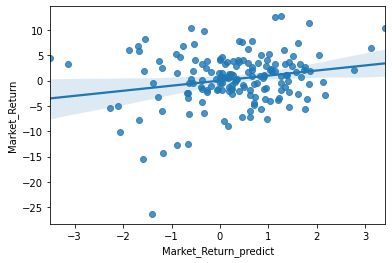

In [62]:
#시장수익률 예측: 한 달후 코스피 지수 수익률
sdata = pd.read_csv("data.csv", index_col=0)
Market_return = sdata.loc[:,'RKOSPI']       # sdata.iloc[:,0]  혹은 sdata.loc[:,'RKOSPI']
x = sdata.loc[:,['RF_M','RFGN_REV','RIPD','RCPI','RSP500','ROil','Rshanghai']]

Market_return = Market_return.reset_index(drop =True)  # reset_index는 인덱스를 무시. drop =True는 기존 인덱스를 없애라는 의미  #이번달 변수로 다음달수익률을 예측시도
print("데이터형식 확인")
print(Market_return)

# One Month Ahead Forecast
X1 = x.iloc[:-1,:].dropna(axis =0).reset_index(drop =True)  # 맨 마지막 관찰치[-1], 0부터 마지막 전까지 포함
Y1 = Market_return[2:].reset_index(drop =True)              # 첫번째 관찰치[0] 없애기, 1부터 전부 포함
model = sm.OLS(Y1,sm.add_constant(X1))
result = model.fit()
print(result.summary())

Market_return_predict1 = result.predict()

sns.regplot(x=Market_return_predict1,
            y=Y1,
            fit_reg=True) # default
plt.xlabel("Market_Return_predict")
plt.ylabel("Market_Return")

plt.show()
#답변: R-squared값이 매우 낮아 변수들의 설명력이 거의 없다고 보여진다. 정성적으로 검토해보아도
#개별주식들의 수익률과 그 변동성을 알 수가 없는데 주식들 전체 포트폴리오의 수익률 또한 예측할 수 없다고 판단된다.

무위험자산의 수익률은 왜 예측할 필요가 없는가?

In [62]:
#무위험자산은 이율이 고정된 1년만기 국고채 등 채권을 기준으로 수익률을 산정하기 때문이다.
#또한, 채권 등의 이율은 중앙은행에서 거시환경 개선 필요성에 의해 조절하는 기준금리 등에 직접적인 영향을 받는다.

• 퀀트데이터에서 10개의 주식을 골라서 60개월의 월별 자료로 베
타를 구하라.


In [45]:
# 개별주식의 총수익률 (RI) 데이터 읽음
RID2 = df['RI']
RID2 = RID2.iloc[0:168,:]
#print("--------------------------------------------------------------------------")
#print("데이터형식 확인")
#print(RID2)

# Dates
date = RID2.index
#print("--------------------------------------------------------------------------")
#print("Dates")
#print(date)

#firm names using 'D_Price'  이름 이외에는 다른 군더기가 없음 ㅎ
D_Price = df['D_P']
firm_names =  D_Price.columns
#print("--------------------------------------------------------------------------")
#print("FIrm Names")
#print(firm_names)

# 각 열별로 NA의 수를 계산
na_counts = RID2.isna().sum()

# NA가 없는 열만 필터링
columns_without_na = na_counts[na_counts == 0].index

# 필터링된 열 중 첫 10개 열만 선택
selected_columns = columns_without_na[:10]
RID2_selected = RID2[selected_columns]
RID2_selected
# #10개 기업선정
# RID2 = RID2.iloc[0:,25:35]
# RID2


,ABLE C&C - TOT RETURN IND,AK HOLDINGS - TOT RETURN IND,AMOREPACIFIC - TOT RETURN IND,AMOREPACIFIC GROUP - TOT RETURN IND,ANAM ELECTRONICS - TOT RETURN IND,APROGEN KIC - TOT RETURN IND,APROGEN PHARMACEUTICALS - TOT RETURN IND,ASIA HOLDINGS - TOT RETURN IND,ASIA PAPER MNFG. - TOT RETURN IND,ASIANA AIRLINES - TOT RETURN IND
Name,,,,,,,,,,
2006-08-31,19.02,68.62,108.57,9020.14,0.62,125.71,6.02,2348.99,118.47,91.97
2006-09-29,19.87,73.70,114.29,9382.40,0.64,130.76,6.08,2266.46,123.59,104.70
2006-10-31,25.27,71.05,126.75,9491.07,0.74,142.37,6.38,2412.48,114.75,96.36
2006-11-30,22.13,88.70,131.17,9780.88,1.04,142.88,5.71,2577.54,181.43,102.42
2006-12-29,20.08,94.74,151.85,14625.21,1.04,158.30,5.26,2708.73,205.59,106.13
...,...,...,...,...,...,...,...,...,...,...
2020-03-31,68.55,146.73,473.56,51748.22,2.84,31.26,0.70,4420.97,591.20,53.13
2020-04-30,86.43,206.24,497.45,54270.25,3.70,54.82,0.87,4929.27,719.29,65.75
2020-05-29,78.34,176.90,458.10,53990.02,4.42,46.89,0.83,4757.86,680.97,63.78


In [46]:
#코스피지수 추출
kospi = df['M_Market']
kospi = kospi.iloc[0:168,0]
date = kospi.index
kospi = kospi.to_frame()
kospi

,KOREA SE COMPOSITE (KOSPI) - PRICE INDEX
Name,
2006-08-31,1352.74
2006-09-29,1371.41
2006-10-31,1364.55
2006-11-30,1432.21
2006-12-29,1434.46
...,...
2020-03-31,1754.64
2020-04-30,1947.56
2020-05-29,2029.60


In [47]:
capm = kospi.join(RID2_selected, how='outer')
firm_names =  capm.columns

In [48]:
############################################################################################
# Calculation of log-returns

R2 = []
print("Null stocks: ", end ='')    # end=''  다음 출력이 같은 줄에 프린트하기
for i in range(0,capm.shape[1]):

    log0 = (np.log(capm.iloc[1:, i ])).reset_index(drop =True)
    log1 = (np.log(capm.iloc[0:-1, i ])).reset_index(drop =True)

    R_temp =  (log0-log1)*100
    R2.append(R_temp)

print(sep ='')

R2 = pd.concat(R2,axis= 1,ignore_index=True)   # R이라는 matrix는 각 개별주식의 수익률 벡터를 순차적으로 오른편으로 덧붙여 작성. axis=0 이면 아래쪽으로 붙임
R2.index = date[1:]         # 첫달 제외
R2.columns = firm_names     # 회사이름


Null stocks: 


In [50]:
# 시장수익률과 무위험자산 수익률을 읽음
sdata = pd.read_csv("data.csv", index_col=0)
# sdata = pd.read_csv("data.csv",index_col=0)   # 자신의 컴퓨터에 설치된 파이썬을 사용하는 경우. 파이썬 코드와 데이터 화일의 위치가 동일해야함. 아니면 폴더 경로를 명시

sdata.index = pd.to_datetime(sdata.index)
#sdata = sdata.dropna(axis=0).drop('Dates', axis=1).reset_index(drop =True)
n = sdata.shape[0]
MR = sdata['RKOSPI']
RF = sdata['RF_M']

MR = MR[1:168]
RF = RF[1:168]

#초과수익률
Sdate = R2.index
R2_Excess = pd.DataFrame(np.empty((R2.shape[0],R2.shape[1]))*np.nan, columns = R2.columns, index=Sdate)

for i in range(0,R2.shape[1]):

    R2_Excess.iloc[:,i] = (R2.iloc[:,i]-RF) # excess returns of individual stocks

R2_Excess


,KOREA SE COMPOSITE (KOSPI) - PRICE INDEX,ABLE C&C - TOT RETURN IND,AK HOLDINGS - TOT RETURN IND,AMOREPACIFIC - TOT RETURN IND,AMOREPACIFIC GROUP - TOT RETURN IND,ANAM ELECTRONICS - TOT RETURN IND,APROGEN KIC - TOT RETURN IND,APROGEN PHARMACEUTICALS - TOT RETURN IND,ASIA HOLDINGS - TOT RETURN IND,ASIA PAPER MNFG. - TOT RETURN IND,ASIANA AIRLINES - TOT RETURN IND
Name,,,,,,,,,,,
2006-09-29,0.997724,3.999000,6.768876,4.761395,3.564574,2.801870,3.565591,0.618744,-3.949631,3.857987,12.590668
2006-10-31,-0.874470,23.667686,-4.034894,9.974756,0.778576,14.145201,8.133572,4.443340,5.870612,-7.794379,-8.673794
2006-11-30,4.466400,-13.641377,21.814603,3.054755,2.634810,33.659581,-0.015419,-11.467907,6.245019,45.438406,5.726083
2006-12-29,-0.217023,-10.094986,6.213641,14.265900,39.857729,-0.374000,9.874685,-8.582800,4.590443,12.127399,3.184275
2007-01-31,-5.699467,-15.172239,-12.979045,-3.536868,-12.902292,1.518819,0.425606,0.748228,2.321834,-9.761975,-6.095745
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-31,-12.519729,-23.260143,-29.060557,4.470506,-11.338496,-29.989075,-16.181224,8.878216,-21.753573,-11.283786,-18.837661
2020-04-30,10.369360,23.115143,33.982638,4.859643,4.696616,26.390877,56.109577,21.679288,10.821178,19.549024,21.249793
2020-05-29,4.068142,-9.885651,-15.403594,-8.298755,-0.575698,17.722688,-15.683066,-4.764751,-3.597292,-5.532636,-3.100001


In [51]:
#2015년부터 60개월 추출
R2_Excess_2015  =  R2_Excess.iloc[-1-66 :  -1-6,:]
Sdate = R2_Excess_2015.index

#베타계산
import statsmodels.api as sm

# R2_2015 데이터프레임에서 초과수익률 열을 추출
market_excess = R2_Excess_2015.iloc[:, 0]  # 시장의 초과수익률 (1열)
stock_excess = R2_Excess_2015.iloc[:, 1:11]  # 10주식 종목의 초과수익률 (2~11열)

betas = []  # 베타 계수 저장용 리스트
stock_names = list(stock_excess.columns)  # 열 이름을 리스트로 가져옴

for i in range(10):
    market_excess = sm.add_constant(market_excess)  # 상수항 추가
    model = sm.OLS(stock_excess.iloc[:, i], market_excess).fit()  # 선형 회귀 모델
    beta = model.params[1]  # 회귀분석 결과에서 기울기 (베타) 추출
    betas.append(beta)

# 결과를 데이터프레임으로 생성
results_df = pd.DataFrame({'Stock Name': stock_names, 'Beta': betas})

# 결과 출력
print("Beta Coefficients:")
print(results_df)
# 0  BUKWANG PHARMACEUTICAL INDUSTRIAL - TOT RETURN...  0.874125
# 1              BUMYANG CONSTRUCTION - TOT RETURN IND  2.548778
# 2                    BUSAN CITY GAS - TOT RETURN IND  0.344706
# 3                  BUSAN INDUSTRIAL - TOT RETURN IND  0.942579
# 4                               BYC - TOT RETURN IND  0.708523
# 5                          BYUCKSAN - TOT RETURN IND  1.573963
# 6                 CAMUS ENGR.& CON. - TOT RETURN IND  1.044164
# 7                             CAPRO - TOT RETURN IND  2.075775
# 8                         CELLTRION - TOT RETURN IND  1.593223
# 9  CENTRAL INSIGHT SUSP - SUSP.29/09/20 - TOT RET...  1.808576

Beta Coefficients:
                                 Stock Name      Beta
0                 ABLE C&C - TOT RETURN IND  1.734515
1              AK HOLDINGS - TOT RETURN IND  1.286685
2             AMOREPACIFIC - TOT RETURN IND  1.830113
3       AMOREPACIFIC GROUP - TOT RETURN IND  1.590299
4         ANAM ELECTRONICS - TOT RETURN IND  1.994047
5              APROGEN KIC - TOT RETURN IND -0.481681
6  APROGEN PHARMACEUTICALS - TOT RETURN IND  1.148741
7            ASIA HOLDINGS - TOT RETURN IND  1.152675
8         ASIA PAPER MNFG. - TOT RETURN IND  0.816221
9          ASIANA AIRLINES - TOT RETURN IND  1.468179


In [53]:
results_df.to_csv('beta.csv')

• 추정된 베타는 통계적으로 유의미한가?

In [52]:
for i in range(10):
    model = sm.OLS(stock_excess.iloc[:, i], market_excess).fit()
    p_value = model.pvalues[1]  # 첫 번째 독립 변수 (시장의 초과수익률)에 대한 p-값 추출
    print(f"Stock {i+1}: p-value = {p_value}")

# Stock 1: p-value = 0.03727778743649221
# Stock 2: p-value = 2.757862734577345e-06
# Stock 3: p-value = 0.004965166734265431
# Stock 4: p-value = 0.27622245117750394
# Stock 5: p-value = 0.0032898920460801943
# Stock 6: p-value = 0.0003662925190595665
# Stock 7: p-value = 0.012473045130103418
# Stock 8: p-value = 1.3244240368055264e-05
# Stock 9: p-value = 0.001054811371771202
# Stock 10: p-value = 0.0021347408266941606

#1개의 종목을 제외한 p값은 모두 0.05 미만으로 통계적으로 유의하다 판단된다.

Stock 1: p-value = 0.0014355444896989654
Stock 2: p-value = 0.0018568322621951054
Stock 3: p-value = 7.241743353538021e-06
Stock 4: p-value = 2.5069838568348448e-05
Stock 5: p-value = 0.015306642892835365
Stock 6: p-value = 0.6362062532085406
Stock 7: p-value = 0.21507243661309844
Stock 8: p-value = 3.482241197391873e-05
Stock 9: p-value = 0.04221964087030774
Stock 10: p-value = 0.00098064130180842


In [ ]:
results_df.to_csv('beta.csv')

• 추정된 알파는 영과 같은가?

In [54]:
for i in range(10):
    model = sm.OLS(stock_excess.iloc[:, i], market_excess).fit()
    alpha = model.params[0]  # 알파(상수항) 추출
    print(f"Stock {i+1}: Alpha = {alpha}")

# Stock 1: Alpha = 0.6782407366236488
# Stock 2: Alpha = -0.07999267934105836
# Stock 3: Alpha = 0.01624243075736248
# Stock 4: Alpha = 3.061630081162588
# Stock 5: Alpha = -0.3399759094408066
# Stock 6: Alpha = -2.0084582567840363
# Stock 7: Alpha = 1.055585771720964
# Stock 8: Alpha = -0.16163786261621915
# Stock 9: Alpha = 2.550599175519545
# Stock 10: Alpha = -0.5971290722131302

#모든 종목이 0이 아닌 결과가 나왔다.

Stock 1: Alpha = -1.2511686551473251
Stock 2: Alpha = -1.5564783013698957
Stock 3: Alpha = -0.452390096449091
Stock 4: Alpha = -0.5732442012358263
Stock 5: Alpha = 1.23426480461631
Stock 6: Alpha = 0.5966267674292376
Stock 7: Alpha = 0.9104975309936787
Stock 8: Alpha = -0.7180913679402208
Stock 9: Alpha = 0.31393178257480936
Stock 10: Alpha = -0.7419093312475367


• 같은 주식에 대하여 24개월이나 84개월을 사용하면 결과가 달라지는가

In [56]:
#2015년부터 24개월 추출
R2_2015_24  =  R2_Excess.iloc[-1-66 :  -1-42,:]
Sdate = R2_2015_24.index

#베타계산
import statsmodels.api as sm

# R2_2015_24 데이터프레임에서 초과수익률 열을 추출
market_excess = R2_2015_24.iloc[:, 0]  # 시장의 초과수익률 (1열)
stock_excess = R2_2015_24.iloc[:, 1:11]  # 10주식 종목의 초과수익률 (2~11열)

betas = []  # 베타 계수 저장용 리스트
stock_names = list(stock_excess.columns)  # 열 이름을 리스트로 가져옴

for i in range(10):
    market_excess = sm.add_constant(market_excess)  # 상수항 추가
    model = sm.OLS(stock_excess.iloc[:, i], market_excess).fit()  # 선형 회귀 모델
    beta = model.params[1]  # 회귀분석 결과에서 기울기 (베타) 추출
    betas.append(beta)

# 결과를 데이터프레임으로 생성
results_df = pd.DataFrame({'Stock Name': stock_names, 'Beta': betas})

# 결과 출력
print("Beta Coefficients:")
print(results_df)
# 0  BUKWANG PHARMACEUTICAL INDUSTRIAL - TOT RETURN...  0.700538
# 1              BUMYANG CONSTRUCTION - TOT RETURN IND  0.815976
# 2                    BUSAN CITY GAS - TOT RETURN IND  0.331422
# 3                  BUSAN INDUSTRIAL - TOT RETURN IND  0.387922
# 4                               BYC - TOT RETURN IND  0.904004
# 5                          BYUCKSAN - TOT RETURN IND  0.794025
# 6                 CAMUS ENGR.& CON. - TOT RETURN IND  1.601245
# 7                             CAPRO - TOT RETURN IND  2.961976
# 8                         CELLTRION - TOT RETURN IND  1.981509
# 9  CENTRAL INSIGHT SUSP - SUSP.29/09/20 - TOT RET...  3.375176

Beta Coefficients:
                                 Stock Name      Beta
0                 ABLE C&C - TOT RETURN IND -0.361273
1              AK HOLDINGS - TOT RETURN IND  1.430748
2             AMOREPACIFIC - TOT RETURN IND  1.428072
3       AMOREPACIFIC GROUP - TOT RETURN IND  1.463847
4         ANAM ELECTRONICS - TOT RETURN IND  2.373520
5              APROGEN KIC - TOT RETURN IND -0.557346
6  APROGEN PHARMACEUTICALS - TOT RETURN IND -2.970691
7            ASIA HOLDINGS - TOT RETURN IND  0.780763
8         ASIA PAPER MNFG. - TOT RETURN IND  1.968007
9          ASIANA AIRLINES - TOT RETURN IND  1.146713


In [57]:
for i in range(10):
    model = sm.OLS(stock_excess.iloc[:, i], market_excess).fit()
    p_value = model.pvalues[1]  # 첫 번째 독립 변수 (시장의 초과수익률)에 대한 p-값 추출
    print(f"Stock {i+1}: p-value = {p_value}")
# Stock 1: p-value = 0.580799408813713
# Stock 2: p-value = 0.4291940679503107
# Stock 3: p-value = 0.3835335743318137
# Stock 4: p-value = 0.769496404412144
# Stock 5: p-value = 0.28897305585394956
# Stock 6: p-value = 0.5464567977621031
# Stock 7: p-value = 0.26804874921930233
# Stock 8: p-value = 0.018369061534393865
# Stock 9: p-value = 0.1325225631760288
# Stock 10: p-value = 0.01143602247996589

Stock 1: p-value = 0.8008002263388083
Stock 2: p-value = 0.2724233715666826
Stock 3: p-value = 0.044235733839752676
Stock 4: p-value = 0.09110727344223603
Stock 5: p-value = 0.025743680219837053
Stock 6: p-value = 0.6584152521873974
Stock 7: p-value = 0.3666596583518045
Stock 8: p-value = 0.18818509908125006
Stock 9: p-value = 0.051857298254642574
Stock 10: p-value = 0.16334934573961232


In [58]:
for i in range(10):
    model = sm.OLS(stock_excess.iloc[:, i], market_excess).fit()
    alpha = model.params[0]  # 알파(상수항) 추출
    print(f"Stock {i+1}: Alpha = {alpha}")

# Stock 1: Alpha = 2.76473890930305
# Stock 2: Alpha = -0.36043470467124905
# Stock 3: Alpha = 0.042898945114800635
# Stock 4: Alpha = 2.567244400364075
# Stock 5: Alpha = 1.5317187927585638
# Stock 6: Alpha = -0.8773008627427314
# Stock 7: Alpha = 2.101887907034369
# Stock 8: Alpha = 3.188040447029446
# Stock 9: Alpha = 4.221034114036564
# Stock 10: Alpha = 1.3056088721680519

# 24개월로 추정한 결과 베타값, p값, 알파값 모두 달라진 것을 확인할 수 있다.

Stock 1: Alpha = 0.33507123262837846
Stock 2: Alpha = -1.7036738681523282
Stock 3: Alpha = 1.2958006451637214
Stock 4: Alpha = 0.9366965242739806
Stock 5: Alpha = 1.1080013241238844
Stock 6: Alpha = 1.4432010920918557
Stock 7: Alpha = 6.725236886895297
Stock 8: Alpha = -1.598708614677705
Stock 9: Alpha = -1.3752605346463427
Stock 10: Alpha = -2.435714134718684


• 퀀트데이터에 있는 베타를 활용하여 CAPM을 테스트하라.
• 임의로 100개의 주식을 선택한 다음 2015년 1월부터 2018년 12월까지 각 월
별로 다음 회귀식 추정하여 r0과 r1를 구하라. rt - rf = r0 + r1b1 + e

In [60]:
# 개별주식의 총수익률 (RI) 데이터 읽음
RID3 = df['RI']
RID3 = RID3.iloc[0:168,:]

# 첫 번째 행이 비어 있지 않은 열 인덱스를 추출
valid_columns = RID3.columns[RID3.iloc[0].notna()]

# 해당 열만 추출
RID3 = RID3[valid_columns]
# Dates
date = RID3.index


#firm names using 'D_Price'  이름 이외에는 다른 군더기가 없음 ㅎ
D_Price = df['D_P']
firm_names =  D_Price.columns


#100개 기업선정
RID3 = RID3.iloc[:, 0:100]
RID3

#코스피지수 추출
kospi = df['M_Market']
kospi = kospi.iloc[0:168,0]
date = kospi.index
kospi = kospi.to_frame()
kospi

capm = kospi.join(RID3, how='outer')
firm_names =  capm.columns

############################################################################################
# Calculation of log-returns

R3 = []
print("Null stocks: ", end ='')    # end=''  다음 출력이 같은 줄에 프린트하기
for i in range(0,capm.shape[1]):

    log0 = (np.log(capm.iloc[1:, i ])).reset_index(drop =True)
    log1 = (np.log(capm.iloc[0:-1, i ])).reset_index(drop =True)

    R_temp =  (log0-log1)*100
    R3.append(R_temp)


R3 = pd.concat(R3,axis= 1,ignore_index=True)   # R이라는 matrix는 각 개별주식의 수익률 벡터를 순차적으로 오른편으로 덧붙여 작성. axis=0 이면 아래쪽으로 붙임
R3.index = date[1:]         # 첫달 제외
R3.columns = firm_names     # 회사이름

# 시장수익률과 무위험자산 수익률을 읽음
sdata = pd.read_csv("data.csv", index_col=0)
# sdata = pd.read_csv("data.csv",index_col=0)   # 자신의 컴퓨터에 설치된 파이썬을 사용하는 경우. 파이썬 코드와 데이터 화일의 위치가 동일해야함. 아니면 폴더 경로를 명시

sdata.index = pd.to_datetime(sdata.index)
#sdata = sdata.dropna(axis=0).drop('Dates', axis=1).reset_index(drop =True)
n = sdata.shape[0]
MR = sdata['RKOSPI']
RF = sdata['RF_M']

MR = MR[1:168]
RF = RF[1:168]

#초과수익률
Sdate = R3.index
R3_Excess = pd.DataFrame(np.empty((R3.shape[0],R3.shape[1]))*np.nan, columns = R3.columns, index=Sdate)

for i in range(0,R3.shape[1]):

    R3_Excess.iloc[:,i] = (R3.iloc[:,i]-RF) # excess returns of individual stocks

#2015년부터 48개월 추출
R3_Excess_2015  =  R3_Excess.iloc[-1-66 :  -1-18,:]
Sdate = R3_Excess_2015.index

#베타계산
import statsmodels.api as sm

# R3_2015 데이터프레임에서 초과수익률 열을 추출
market_excess = R3_Excess_2015.iloc[:, 0]  # 시장의 초과수익률 (1열)
stock_excess = R3_Excess_2015.iloc[:, 1:101]  # 10주식 종목의 초과수익률 (2~101열)

betas = []  # 베타 계수 저장용 리스트
stock_names = list(stock_excess.columns)  # 열 이름을 리스트로 가져옴

for i in range(100):
    market_excess = sm.add_constant(market_excess)  # 상수항 추가
    model = sm.OLS(stock_excess.iloc[:, i], market_excess).fit()  # 선형 회귀 모델
    beta = model.params[1]  # 회귀분석 결과에서 기울기 (베타) 추출
    betas.append(beta)

# 결과를 데이터프레임으로 생성
results_df = pd.DataFrame({'Stock Name': stock_names, 'Beta': betas})

# 결과 출력
print("Beta Coefficients:")
print(results_df)

Null stocks: Beta Coefficients:
                                  Stock Name      Beta
0                  ABLE C&C - TOT RETURN IND  1.771274
1               AK HOLDINGS - TOT RETURN IND  1.549320
2              AMOREPACIFIC - TOT RETURN IND  2.234291
3        AMOREPACIFIC GROUP - TOT RETURN IND  1.907475
4          ANAM ELECTRONICS - TOT RETURN IND  2.778195
..                                       ...       ...
95             DAYOU A-TECH - TOT RETURN IND  1.546022
96               DAYOU PLUS - TOT RETURN IND  0.796984
97                       DB - TOT RETURN IND  0.919029
98  DB FINANCIAL INVESTMENT - TOT RETURN IND  1.733312
99                 DB HITEK - TOT RETURN IND  1.105228

[100 rows x 2 columns]


In [62]:
# 결과를 저장할 데이터프레임 생성
regression_results = pd.DataFrame(columns=['period', 'r0', 'r1','rm-rf'])

# 베타 값이 저장된 결과 데이터프레임을 이용하여 각 기간에 대한 회귀 분석 수행
for i in range(48):
    y = R3_Excess_2015.iloc[i, 1:101]  # 종속 변수: 주식의 초과수익률 (rt - rf)
    X = sm.add_constant(betas)  # 베타 값을 독립 변수로 설정
    model = sm.OLS(y, X).fit()  # 선형 회귀 모델

    # 결과를 데이터프레임에 추가
    regression_results = regression_results.append({'period': R3_Excess_2015.index[i], 'r0': model.params[0], 'r1': model.params[[1]],'rm-rf':R3_Excess_2015.iloc[i,0] }, ignore_index=True)

regression_results
#      period	     r0	           r1	                    rm-rf
# 0	2015-01-30	3.970418	x1 1.735006 dtype: float64	1.576414
# 1	2015-02-27	0.364774	x1 6.720712 dtype: float64	1.691204
# 2	2015-03-31	3.890270	x1 3.259632 dtype: float64	2.590273
# 3	2015-04-30	3.094379	x1 1.54973 dtype: float64	3.989788
# 4	2015-05-29	4.485520	x1 -1.321875 dtype: float64	-0.728221
# 5	2015-06-30	1.513398	x1 1.535629 dtype: float64	-2.070471
# 6	2015-07-31	3.154703	x1 -0.547876 dtype: float64	-2.269093
# 7	2015-08-31	-2.227964	x1 -4.310983 dtype: float64	-4.589889
# 8	2015-09-30	0.621750	x1 -0.815775 dtype: float64	0.969140
# 9	2015-10-30	-5.570162	x1 3.460911 dtype: float64	3.216756
# 10	2015-11-30	-2.754842	x1 0.06242 dtype: float64	-1.989058
# 11	2015-12-31	3.251277	x1 -1.546161 dtype: float64	-1.674148
# 12	2016-01-29	0.176130	x1 -1.418237 dtype: float64	-2.667142
# 13	2016-02-29	-4.636619	x1 1.133026 dtype: float64	0.116289
# 14	2016-03-31	5.859296	x1 0.344774 dtype: float64	3.924594
# 15	2016-04-29	-1.972726	x1 2.652713 dtype: float64	-0.208213
# 16	2016-05-31	3.468465	x1 -2.241061 dtype: float64	-0.664535
# 17	2016-06-30	-1.256772	x1 -1.266972 dtype: float64	-0.768135
# 18	2016-07-29	-0.977325	x1 3.667122 dtype: float64	2.196840
# 19	2016-08-31	-4.959639	x1 0.164768 dtype: float64	0.808422
# 20	2016-09-30	2.171930	x1 -0.061631 dtype: float64	0.337382
# 21	2016-10-31	-5.215152	x1 -1.074534 dtype: float64	-1.852382
# 22	2016-11-30	-1.603931	x1 -2.535439 dtype: float64	-1.341094
# 23	2016-12-30	2.044419	x1 1.430076 dtype: float64	2.041755
# 24	2017-01-31	-0.485160	x1 -1.141478 dtype: float64	1.905358
# 25	2017-02-28	-2.879435	x1 3.848104 dtype: float64	1.054444
# 26	2017-03-31	-4.956436	x1 5.564859 dtype: float64	3.123625
# 27	2017-04-28	4.251950	x1 -2.548454 dtype: float64	1.968234
# 28	2017-05-31	2.027585	x1 2.350012 dtype: float64	6.134278
# 29	2017-06-30	-0.906076	x1 -0.066219 dtype: float64	1.771223
# 30	2017-07-31	-3.439058	x1 0.296102 dtype: float64	0.352523
# 31	2017-08-31	-3.917281	x1 2.057477 dtype: float64	-1.761487
# 32	2017-09-29	-2.970539	x1 -2.101683 dtype: float64	1.210951
# 33	2017-10-31	-3.413804	x1 4.42006 dtype: float64	5.142718
# 34	2017-11-30	8.382606	x1 -4.174108 dtype: float64	-1.987531
# 35	2017-12-29	-0.831192	x1 -0.822538 dtype: float64	-0.485234
# 36	2018-01-31	0.365442	x1 7.427239 dtype: float64	3.808608
# 37	2018-02-28	-0.756253	x1 -3.115005 dtype: float64	-5.696327
# 38	2018-03-30	0.548276	x1 0.753802 dtype: float64	0.634846
# 39	2018-04-30	2.242928	x1 3.235822 dtype: float64	2.680117
# 40	2018-05-31	8.497783	x1 -4.570481 dtype: float64	-3.866332
# 41	2018-06-29	-3.023714	x1 -4.542462 dtype: float64	-4.204463
# 42	2018-07-31	-2.775501	x1 -1.175627 dtype: float64	-1.459982
# 43	2018-08-31	1.624740	x1 0.022373 dtype: float64	1.072167
# 44	2018-09-28	1.189952	x1 -0.428806 dtype: float64	0.737424
# 45	2018-10-31	0.505405	x1 -18.960062 dtype: float64	-14.483896
# 46	2018-11-30	4.146169	x1 4.68781 dtype: float64	3.129792
# 47	2018-12-31	4.362997	x1 -2.875251 dtype: float64	-2.845151



,period,r0,r1,rm-rf
0,2015-01-30,3.970418,x1 1.735006 dtype: float64,1.576414
1,2015-02-27,0.364774,x1 6.720712 dtype: float64,1.691204
2,2015-03-31,3.890270,x1 3.259632 dtype: float64,2.590273
3,2015-04-30,3.094379,x1 1.54973 dtype: float64,3.989788
4,2015-05-29,4.485520,x1 -1.321875 dtype: float64,-0.728221
5,2015-06-30,1.513398,x1 1.535629 dtype: float64,-2.070471
6,2015-07-31,3.154703,x1 -0.547876 dtype: float64,-2.269093
7,2015-08-31,-2.227964,x1 -4.310983 dtype: float64,-4.589889
8,2015-09-30,0.621750,x1 -0.815775 dtype: float64,0.969140
9,2015-10-30,-5.570162,x1 3.460911 dtype: float64,3.216756


In [64]:
regression_results.to_csv('r0r1.csv')

• 이 경우 r0과 r1에 대한 귀무가설은 어떻게 되는가?

In [ ]:
#이론상 r0는 0이 나오고 r1은 rm-rf가 나와야 하지만 실증분석 결과는 그렇지 않다는 것을 알 수 있다.

• CAPM이 개별 자산의 수익률을 설명하는가?

In [ ]:
#CAPM은 개별자산의 수익률을 잘 설명하지 못하고 있다.

• 이 분석방법의 문제는 무엇이고, 이를 피할 수 있는 방법은 무엇인가?

In [ ]:
#CAPM은 개별주식의 베타(체계적위험)만으로 수익률을 추정한다. 이는 많은 가정들이 비현실적임을 나타낸다고 해석할 수 있다.
#이를 피하기 위해 베타 이외에 다양한 요인을 추가 함으로써 베타가 설명하지 못하는 변수를 추가하는 다요인모형이 필요하다 판단된다.